In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv'

In [121]:
df = pd.read_csv(url)
selected_cols = ['year', 'budget_2013$', 'intgross_2013$']

In [122]:
selected_df = df[selected_cols]

In [60]:
df_removed_na = df.dropna(subset=['intgross_2013$'])

In [123]:
# df_removed_na

In [151]:
feature_cols = ['title', 'year', 'budget_2013$', 'intgross_2013$']
df_removed_na[feature_cols].to_csv('movie_data_cleaned.csv')

In [152]:
df = pd.read_csv('movie_data_cleaned.csv', index_col = 0)

In [153]:
df.columns

Index(['title', 'year', 'budget_2013$', 'intgross_2013$'], dtype='object')

In [125]:
X.to_csv('movie_features_cleaned.csv')

In [126]:
y = df_removed_na['intgross_2013$']

In [136]:
y.to_csv('movie_target_cleaned.csv', header= True)

In [137]:
import pandas as pd
X = pd.read_csv('movie_features_cleaned.csv')
y = pd.read_csv('movie_target_cleaned.csv')

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
model = DecisionTreeRegressor()

In [140]:
model.fit(X, y)

ValueError: Number of labels=1782 does not match number of samples=1783

In [74]:
model.score(X, y)

0.8970984731224119

In [59]:
import plotly.graph_objects as go

In [77]:
df_removed_na.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

In [99]:
sampled_df = df_removed_na.sample(50)

In [100]:
feature_cols = ['year', 'budget_2013$']
sampled_X = sampled_df[feature_cols]

In [110]:
errors = (sampled_df['intgross_2013$'] - est_y).to_numpy()

In [101]:
est_y = model.predict(sampled_X)

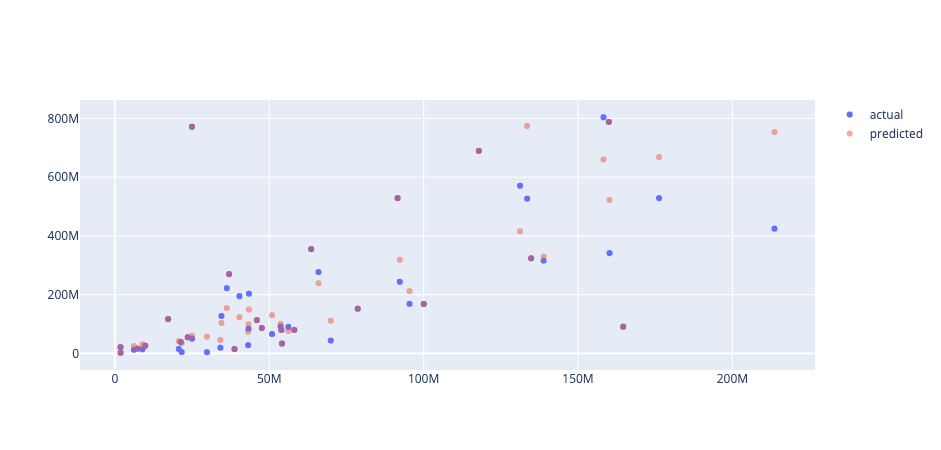

In [119]:
scatter_expected = go.Scatter(x=sampled_df['budget_2013$'], 
                              y = est_y, 
                              hovertext = sampled_df['title'], 
                              mode = 'markers', 
                              name = 'predicted',
                              opacity = .5)


scatter_actual = go.Scatter(x =sampled_df['budget_2013$'], 
                            y = sampled_df['intgross_2013$'], 
                            hovertext = sampled_df['title'], 
                            mode = 'markers',
                            name = 'actual')
go.Figure(data = [scatter_actual, scatter_expected])

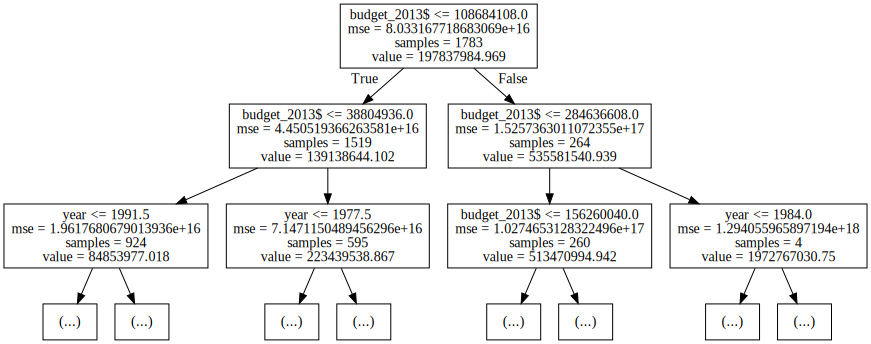

In [120]:
from dtreeviz.trees import dtreeviz
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))